In [180]:
###<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

SyntaxError: invalid syntax (<ipython-input-180-73fed056394c>, line 7)

In [181]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [182]:
sat_file_path = 'sat_scores.csv'
with open(sat_filepath,'r') as f: 
    reader = csv.reader(f)
    for row in reader:
        if columns:
            for i, value in enumerate(row):
                try:
                    columns[i].append(int(value))
                except:
                    columns[i].append(value)
        else:
            columns = [[value] for value in row]
sat_dict = {c[0] : c[1:] for c in columns}
sat_dict


{'Math': [510,
  513,
  515,
  505,
  516,
  499,
  499,
  506,
  500,
  501,
  499,
  510,
  499,
  489,
  501,
  488,
  474,
  526,
  499,
  527,
  499,
  515,
  510,
  517,
  525,
  515,
  542,
  439,
  539,
  512,
  542,
  553,
  542,
  589,
  550,
  545,
  572,
  589,
  580,
  554,
  568,
  561,
  577,
  562,
  596,
  550,
  570,
  603,
  582,
  599,
  551,
  514,
  'Math',
  510,
  513,
  515,
  505,
  516,
  499,
  499,
  506,
  500,
  501,
  499,
  510,
  499,
  489,
  501,
  488,
  474,
  526,
  499,
  527,
  499,
  515,
  510,
  517,
  525,
  515,
  542,
  439,
  539,
  512,
  542,
  553,
  542,
  589,
  550,
  545,
  572,
  589,
  580,
  554,
  568,
  561,
  577,
  562,
  596,
  550,
  570,
  603,
  582,
  599,
  551,
  514,
  'Math',
  510,
  513,
  515,
  505,
  516,
  499,
  499,
  506,
  500,
  501,
  499,
  510,
  499,
  489,
  501,
  488,
  474,
  526,
  499,
  527,
  499,
  515,
  510,
  517,
  525,
  515,
  542,
  439,
  539,
  512,
  542,
  553,
  542,
  589,
  550,

1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [183]:
import pandas as pd
sat = pd.DataFrame(sat_dict)
sat.dtypes
#DataFrame is the exact order but dictionary will vary in order.


Math      object
Rate      object
State     object
Verbal    object
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [184]:
sat = pd.read_csv(sat_file_path)
sat.head(10)


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [185]:
data_dic = {'State': [sat.State.dtypes, '50 states'], 
            'Rate':[sat.Rate.dtypes, 'percentage of students who take the SAT test'],
            'Verbal':[sat.Verbal.dtypes, 'verbal average score by state'],
            'Math': [sat.Math.dtypes, 'mathaverage score by state'],
            'Shape':[sat.shape]}
data_dic

{'Math': [dtype('int64'), 'mathaverage score by state'],
 'Rate': [dtype('int64'), 'percentage of students who take the SAT test'],
 'Shape': [(52, 4)],
 'State': [dtype('O'), '50 states'],
 'Verbal': [dtype('int64'), 'verbal average score by state']}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [186]:
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


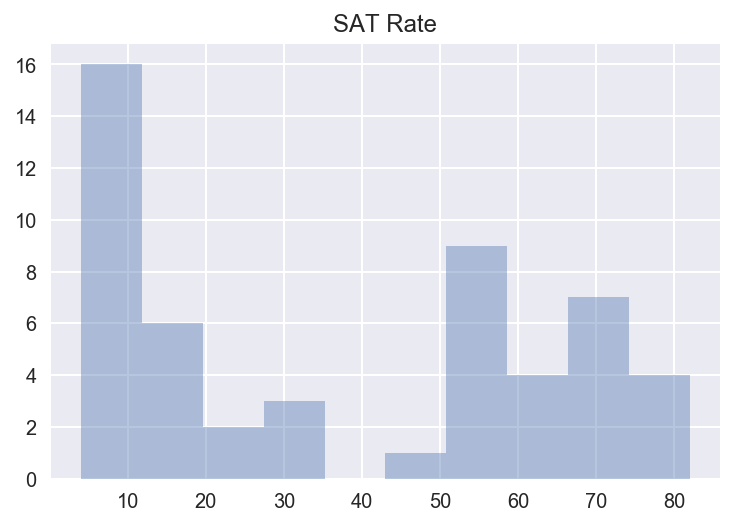

In [187]:
sns.distplot(sat[['Rate']],10, kde=False, label = 'Rate')
sns.plt.title('SAT Rate')
plt.show()

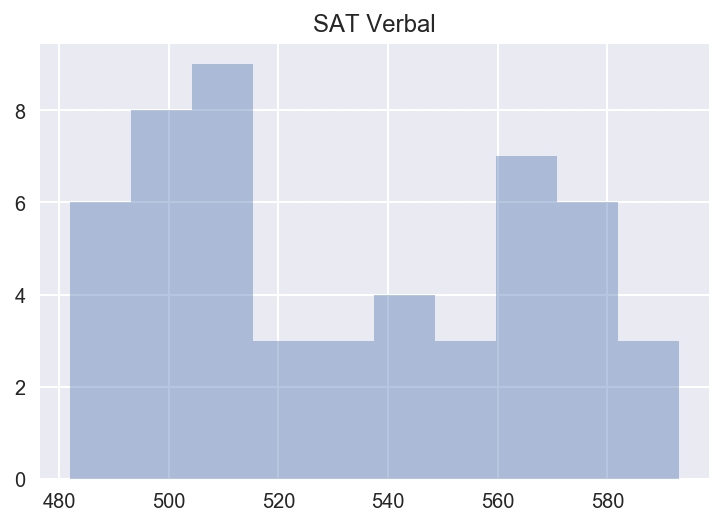

In [188]:
sns.distplot(sat[['Verbal']],10, kde=False, label='Verbal')
sns.plt.title('SAT Verbal')


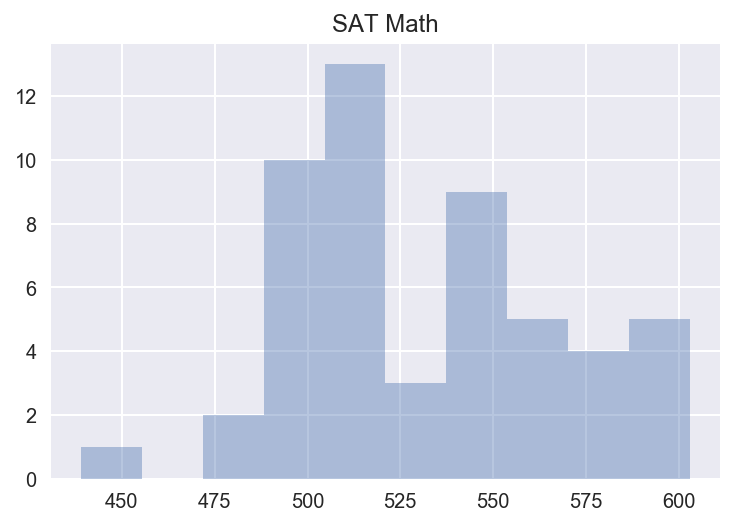

In [189]:
sns.distplot(sat[['Math']], 10, kde=False, label="Math")
sns.plt.title('SAT Math')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

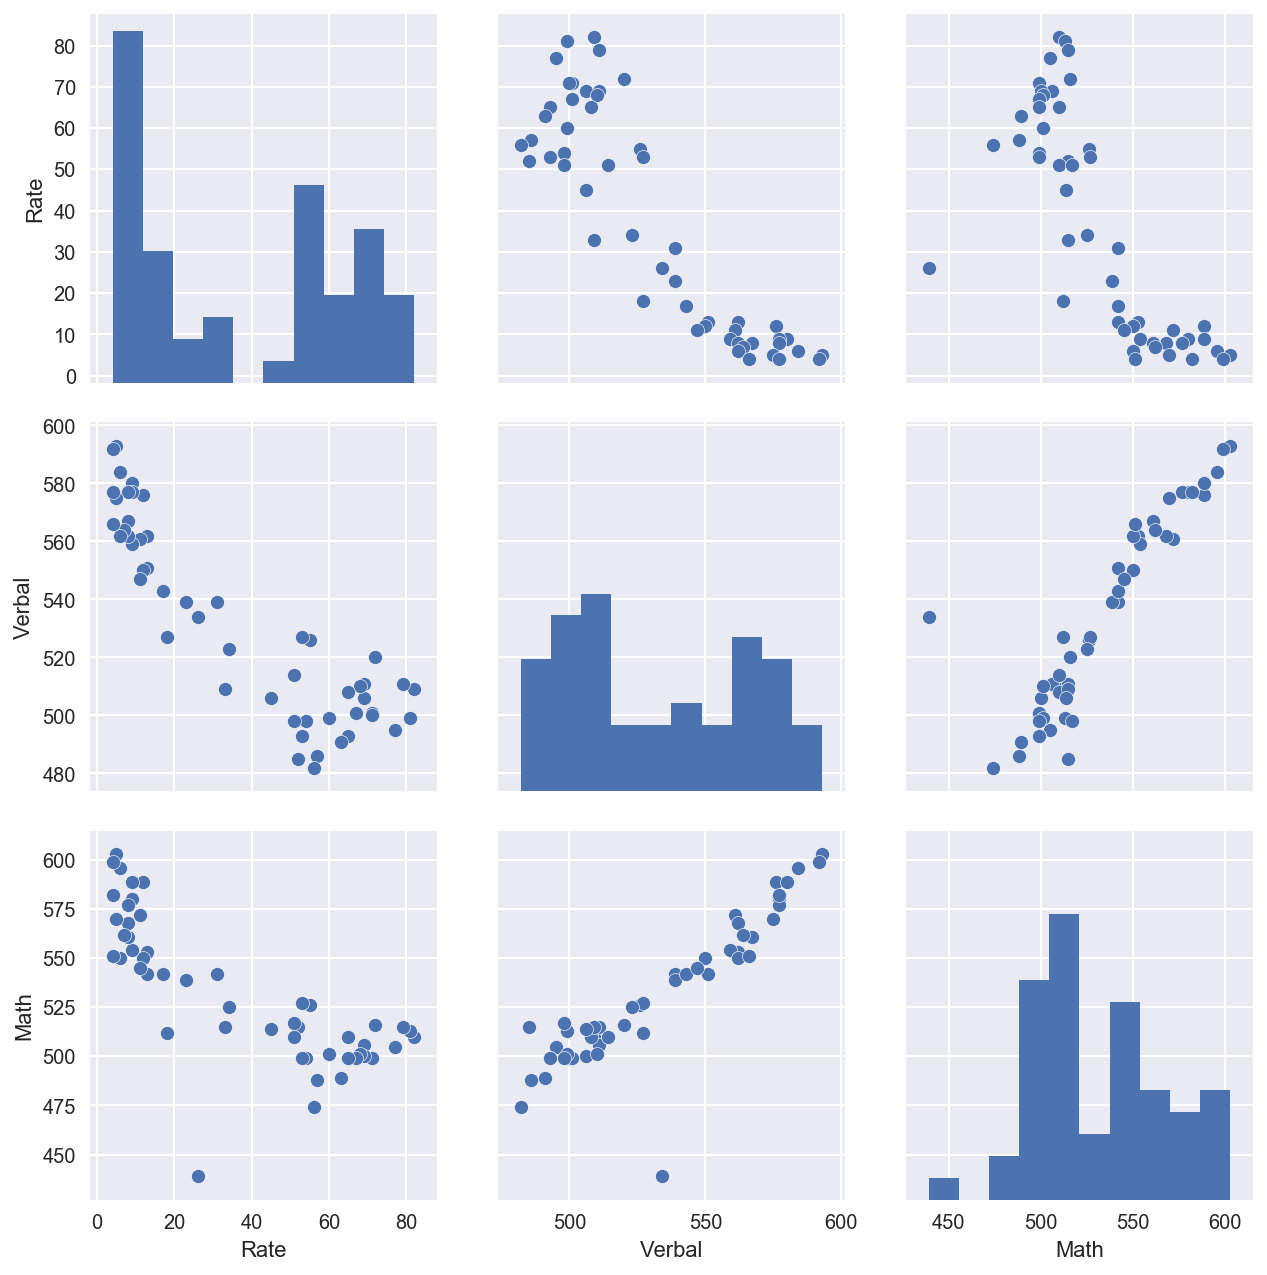

In [190]:
sns.pairplot(sat, size=3)
#The diagonal Axes are treated differently, pair plot shows the univariate
#distribution of the data for the variable in that column. In this case the univariats are Rate
#agains Rate, verbal against verbal, and math agiast math. The scatter plots show relationship
#between two variables. In joint plots, variables such as math and verbal are positively 
#related or in case of Verbal and Rate we can see negative relationship between two variables. 



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

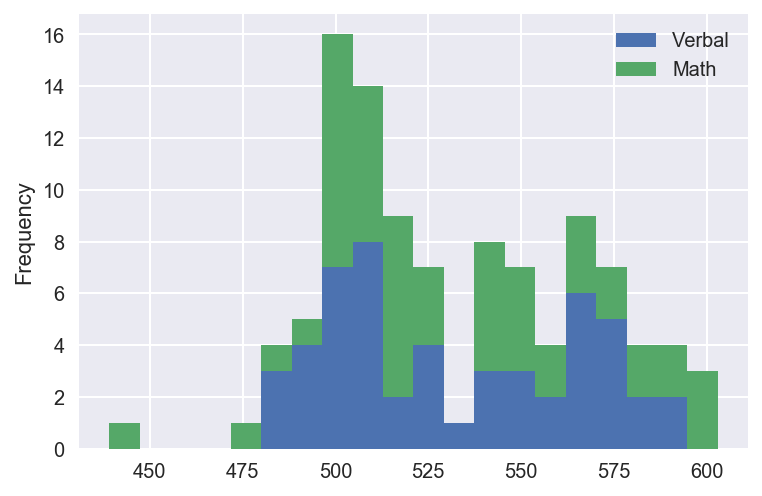

In [191]:
#we need to define verbal and mathe subsets of DataFram
df_sub = sat.loc[0:, ['Verbal', 'Math']]
df_sub.plot.hist(stacked=True, bins = 20)


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [192]:
#df_sub = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

#In [35]: df_sub.plot.box()

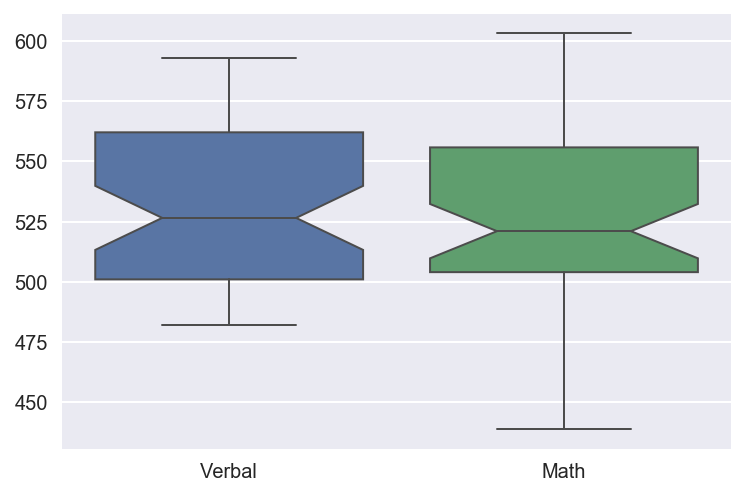

In [193]:
#Boxplot for the subset of Math and Verbal
sns.boxplot(data=df_sub, orient='v',fliersize=5, linewidth=1, notch=True)

ax.set_title('SAT Math vs Verbal', fontsize=20)

plt.show()

#we are able to compare verbal and math for SAT scores percentile. Boxplot give us 
# better visualization rather than histogram.

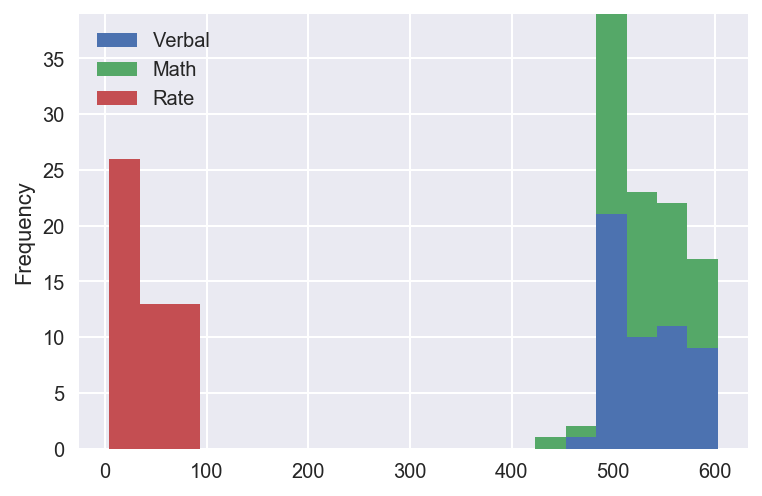

In [194]:
#now we add Rate to see what happens if we plot rate
df_sub = sat.loc[0:, ['Verbal', 'Math', 'Rate']]
df_sub.plot.hist(stacked=True, bins=20)


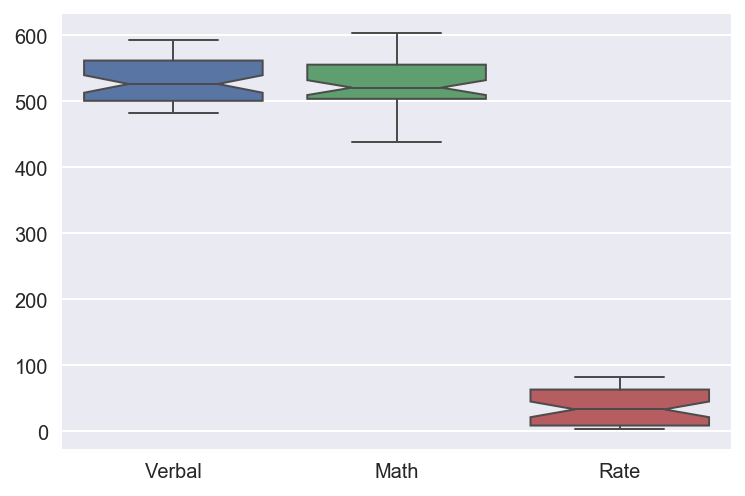

In [403]:
sns.boxplot(data=df_sub, orient='v', linewidth=1, notch=True)
ax.set_title('SAT Verbal, Math and Rate', Fontsize=20)
plt.show()
#the Rate is out of verbal and math range. This will make the comparison between 3 variables
#more difficult  

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [404]:
#I already plot them all in previous q. To make sense of this chart we need to normalize 
#the chart. I couldn't figure out the error!
normalize_variable = (sat - np.mean(sat)) / np.std(sat)
sns.boxplot(data=normalized_variable, orient='v', linewidth=1, notch=True)
ax.set_title('SAT Verbal, Math and Rate', Fontsize=20)
plt.show()


ValueError: can only convert an array of size 1 to a Python scalar

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [405]:
print(np.mean(sat.Verbal))

532.0192307692307


In [406]:
high_verbal = sat['Verbal'] > np.mean(sat.Verbal)
print(sat.loc[high_verbal, 'State'])
print("high_verbal", len(sat.loc[high_verbal]))


26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
high_verbal 24


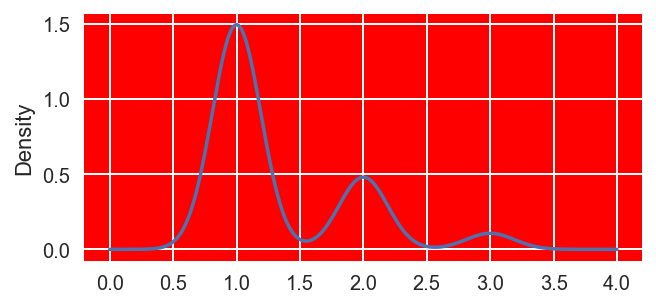

In [407]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(212, facecolor = 'r')
sat.groupby( ['Verbal'] ).count().unstack().plot(kind="kde")
plt.show()
#almsot normal distribution with slight tendency to the right. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [408]:
np.median(sat.Verbal)

526.5

In [413]:
med_verbal = sat['Verbal'] > np.median(sat.Verbal)
print(sat.loc[med_verbal, 'State'])
print("med_verbal", len(sat.loc[med_verbal]))
#median score is slightly higher than mean.


19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
med_verbal 26


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [438]:
#Using .loc to subset the df to Math.
final = sat.Verbal - sat.Math
sat['Difference'] = final
sat[['Difference']]

,Difference
0,-1
1,-14
2,-4
3,-10
4,4
5,2
6,1
7,5
8,6
9,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [439]:

first_df = sat.sort_values(by='Difference', ascending=False)
final = sat.Math - sat.Verbal
print(first_df.head(3))

sat.drop('Difference', axis=1, inplace=True)

sat['InvDiff'] = final
second_df = sat.sort_values(by="InvDiff", ascending=False)
print(second_df.head(3))



   State  Rate  Verbal  Math  InvDiff  Difference
27    OH    26     534   439      -95          95
50    MS     4     566   551      -15          15
29    WV    18     527   512      -15          15
   State  Rate  Verbal  Math  InvDiff
21    HI    52     485   515       30
23    CA    51     498   517       19
1     NJ    81     499   513       14



## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


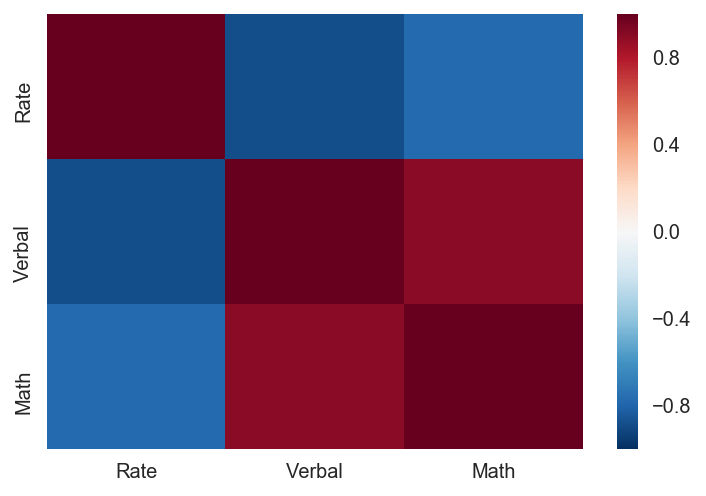

In [440]:
import numpy as np
sat.drop('InvDiff', axis=1, inplace=True)
sns.heatmap(sat.corr())
#perfect positive correlations = 1, perfect negative correlation = -1, no correlation = 0. 
#verbal and math have high correlation as red color shows. 
#Rate and math are midium negatively correlated.
# Rate and verbal are more negatively correlated.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [443]:
print(sat.describe())
#count: number of rows
#mean: central tendency or average of data 
#std: standard deviation 
#min:minimum value
#25%: 25 percentile 
#50%: 50 percentile
#75%: 75 percentile
#max:maximum value


            Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

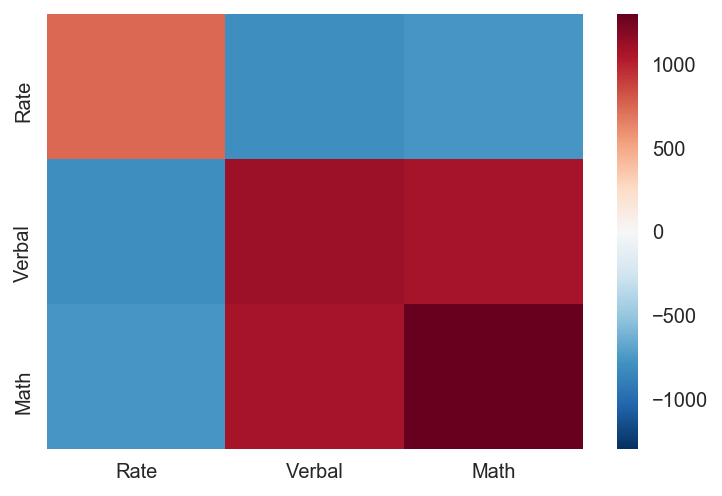

In [495]:
sns.heatmap(sat.cov())
#covariant: when random variables change together. corelation: how random variables corelate 
#to eachother.this matrix makes it dificult to understand how out variables change together. 
#covariant to correlation= covariance/std(x)(y)
#correlation matrix has range on -1, 0 and 1 that can be predicted as negative, nutral, or 
#positive correlation respectively

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [532]:
#Load the data into the csv
#convert the string values to float.
drug_data_filepath = 'drug-use-by-age.csv'
import csv
columns = []
with open(drug_data_filepath,'rU') as f: 
    reader = csv.reader(f)
    for row in reader:
        if columns:
            for i, value in enumerate(row):
                try:
                    columns[i].append(float(value))
                except:
                    columns[i].append(value)
        else:
            # first row
            columns = [[value] for value in row]
drug_dict = {c[0] : c[1:] for c in columns}
drug = pd.DataFrame(drug_dict)
drug
#this data requires cleaning.
#changed the values from string to float 
#didnt consider the NaN when calculating the mean and median

/Users/SamiraMiss/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 'U' mode is deprecated


,age,alcohol-frequency,alcohol-use,cocaine-frequency,cocaine-use,crack-frequency,crack-use,hallucinogen-frequency,hallucinogen-use,heroin-frequency,...,oxycontin-frequency,oxycontin-use,pain-releiver-frequency,pain-releiver-use,sedative-frequency,sedative-use,stimulant-frequency,stimulant-use,tranquilizer-frequency,tranquilizer-use
0,12,3.0,3.9,5,0.1,-,0.0,52.0,0.2,35.5,...,24.5,0.1,36.0,2.0,13.0,0.2,2.0,0.2,52.0,0.2
1,13,6.0,8.5,1,0.1,3,0.0,6.0,0.6,-,...,41,0.1,14.0,2.4,19.0,0.1,4.0,0.3,25.5,0.3
2,14,5.0,18.1,5.5,0.1,-,0.0,3.0,1.6,2,...,4.5,0.4,12.0,3.9,16.5,0.2,12.0,0.8,5.0,0.9
3,15,6.0,29.2,4,0.5,9.5,0.1,4.0,2.1,1,...,3,0.8,10.0,5.5,30.0,0.4,6.0,1.5,4.5,2.0
4,16,10.0,40.1,7,1.0,1,0.0,3.0,3.4,66.5,...,4,1.1,7.0,6.2,3.0,0.2,9.5,1.8,11.0,2.4
5,17,13.0,49.3,5,2.0,21,0.1,3.0,4.8,64,...,6,1.4,9.0,8.5,6.5,0.5,9.0,2.8,7.0,3.5
6,18,24.0,58.7,5,3.2,10,0.4,4.0,7.0,46,...,7,1.7,12.0,9.2,10.0,0.4,8.0,3.0,12.0,4.9
7,19,36.0,64.6,5.5,4.1,2,0.5,3.0,8.6,180,...,7.5,1.5,12.0,9.4,6.0,0.3,6.0,3.3,4.5,4.2
8,20,48.0,69.7,8,4.9,5,0.6,2.0,7.4,45,...,12,1.7,10.0,10.0,4.0,0.5,12.0,4.0,10.0,5.4
9,21,52.0,83.2,5,4.8,17,0.5,4.0,6.3,30,...,13.5,1.3,15.0,9.0,9.0,0.3,10.0,4.1,7.0,3.9


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [ ]:
#age from 12 to 65 plus
#different drug type
#21 rows, 7 objects
#

In [533]:
drug = pd.DataFrame(drug_dict)

In [534]:
print(drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
alcohol-frequency          17 non-null float64
alcohol-use                17 non-null float64
cocaine-frequency          17 non-null object
cocaine-use                17 non-null float64
crack-frequency            17 non-null object
crack-use                  17 non-null float64
hallucinogen-frequency     17 non-null float64
hallucinogen-use           17 non-null float64
heroin-frequency           17 non-null object
heroin-use                 17 non-null float64
inhalant-frequency         17 non-null object
inhalant-use               17 non-null float64
marijuana-frequency        17 non-null float64
marijuana-use              17 non-null float64
meth-frequency             17 non-null object
meth-use                   17 non-null float64
n                          17 non-null float64
oxycontin-frequency        17 non-null object
oxycontin-u

In [535]:
drug.mean(axis=0, skipna=True)

alcohol-frequency            33.352941
alcohol-use                  55.429412
cocaine-use                   2.176471
crack-use                     0.294118
hallucinogen-frequency        8.411765
hallucinogen-use              3.394118
heroin-use                    0.352941
inhalant-use                  1.388235
marijuana-frequency          42.941176
marijuana-use                18.923529
meth-use                      0.382353
n                          3251.058824
oxycontin-use                 0.935294
pain-releiver-frequency      14.705882
pain-releiver-use             6.270588
sedative-frequency           19.382353
sedative-use                  0.282353
stimulant-frequency          31.147059
stimulant-use                 1.917647
tranquilizer-frequency       11.735294
tranquilizer-use              2.805882
dtype: float64

In [536]:
drug.median(axis = 0, skipna = True)

alcohol-frequency            48.0
alcohol-use                  64.6
cocaine-use                   2.0
crack-use                     0.4
hallucinogen-frequency        3.0
hallucinogen-use              3.2
heroin-use                    0.2
inhalant-use                  1.4
marijuana-frequency          52.0
marijuana-use                20.8
meth-use                      0.4
n                          2798.0
oxycontin-use                 1.1
pain-releiver-frequency      12.0
pain-releiver-use             6.2
sedative-frequency           10.0
sedative-use                  0.3
stimulant-frequency          10.0
stimulant-use                 1.8
tranquilizer-frequency       10.0
tranquilizer-use              3.5
dtype: float64

In [537]:
 drug.describe()

,alcohol-frequency,alcohol-use,cocaine-use,crack-use,hallucinogen-frequency,hallucinogen-use,heroin-use,inhalant-use,marijuana-frequency,marijuana-use,...,n,oxycontin-use,pain-releiver-frequency,pain-releiver-use,sedative-frequency,sedative-use,stimulant-frequency,stimulant-use,tranquilizer-frequency,tranquilizer-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,33.352941,55.429412,2.176471,0.294118,8.411765,3.394118,0.352941,1.388235,42.941176,18.923529,...,3251.058824,0.935294,14.705882,6.270588,19.382353,0.282353,31.147059,1.917647,11.735294,2.805882
std,21.318833,26.878866,1.816772,0.235772,15.000245,2.792506,0.333762,0.927283,18.362566,11.959752,...,1297.890426,0.608216,6.935098,3.166379,24.833527,0.138000,85.973790,1.407673,11.485205,1.753379
min,3.000000,3.900000,0.000000,0.000000,2.000000,0.100000,0.000000,0.000000,4.000000,1.100000,...,2223.000000,0.000000,7.000000,0.600000,3.000000,0.000000,2.000000,0.000000,4.500000,0.200000
25%,10.000000,40.100000,0.500000,0.000000,3.000000,0.600000,0.100000,0.600000,30.000000,8.700000,...,2469.000000,0.400000,12.000000,3.900000,6.500000,0.200000,7.000000,0.600000,6.000000,1.400000
50%,48.000000,64.600000,2.000000,0.400000,3.000000,3.200000,0.200000,1.400000,52.000000,20.800000,...,2798.000000,1.100000,12.000000,6.200000,10.000000,0.300000,10.000000,1.800000,10.000000,3.500000
75%,52.000000,77.500000,4.000000,0.500000,4.000000,5.200000,0.600000,2.000000,52.000000,28.400000,...,3058.000000,1.400000,15.000000,9.000000,17.500000,0.400000,12.000000,3.000000,11.000000,4.200000
max,52.000000,84.200000,4.900000,0.600000,52.000000,8.600000,1.100000,3.000000,72.000000,34.000000,...,7391.000000,1.700000,36.000000,10.000000,104.000000,0.500000,364.000000,4.100000,52.000000,5.400000


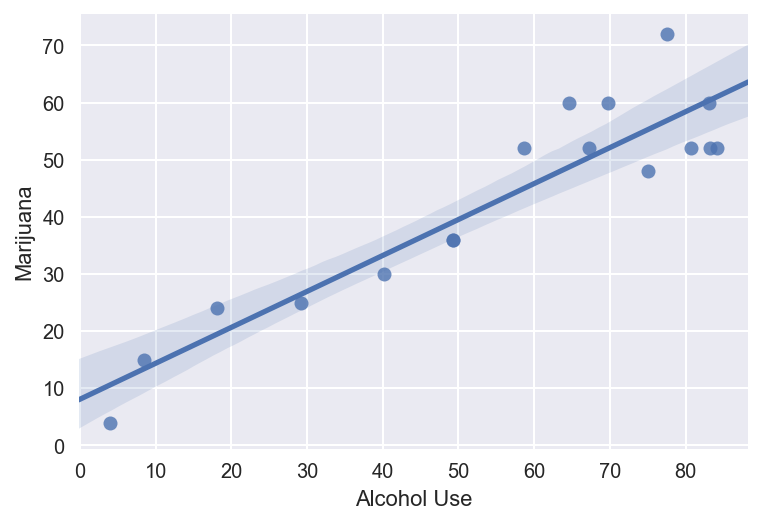

In [538]:
x, y = pd.Series(drug['alcohol-use'], name="Alcohol Use"), pd.Series(drug['marijuana-frequency'], name="Marijuana")
ax = sns.regplot(x=x, y=y, marker="o")
# positive correlation.


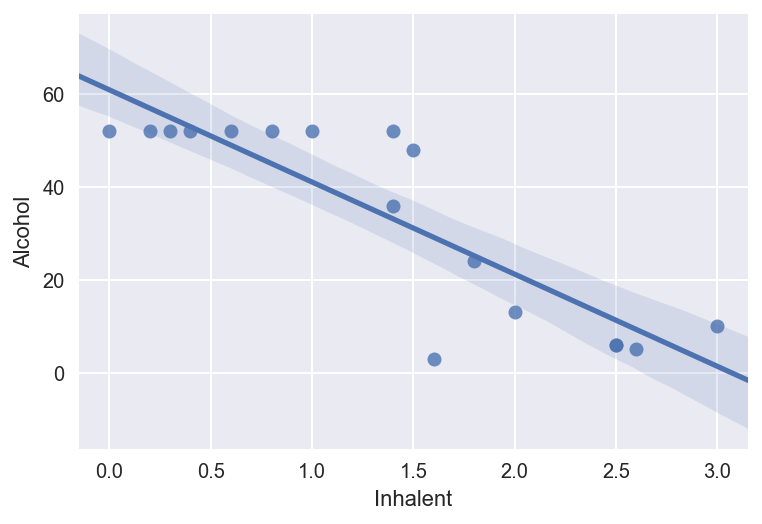

In [539]:
x, y = pd.Series(drug['inhalant-use'], name="Inhalent"), pd.Series(drug['alcohol-frequency'], name="Alcohol")
ax = sns.regplot(x=x, y=y, marker="o")
#negative correlation

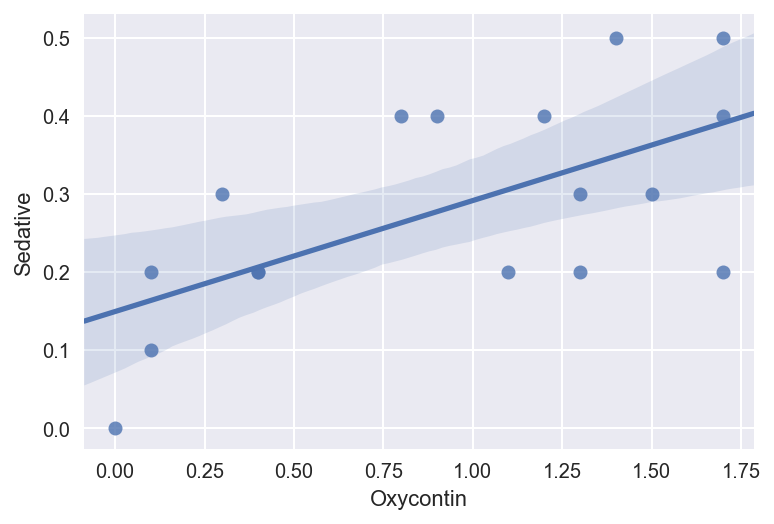

In [540]:
x, y = pd.Series(drug['oxycontin-use'], name="Oxycontin"), pd.Series(drug['sedative-use'], name="Sedative")
ax = sns.regplot(x=x, y=y, marker="o")
#some how positive regression

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
#hypothesis 
#there is a high correlation between alcohol usage and Mj users among specific group.
#heatmap shows high correlation between alcohol usage and mj usage
#taking each variable mean and median to compare the correlation could be useful
#pair plot can help to get better idea of correlation 
#by looking at the heatmap we see that the correlation between Mj and alcohole usage is not dark 
#red. it is some how dark orange coror. this indicate that the correlation between the usage
#of alcohol and mj in certain age isn't that highly correlated and we can reject our
#null hypothesis

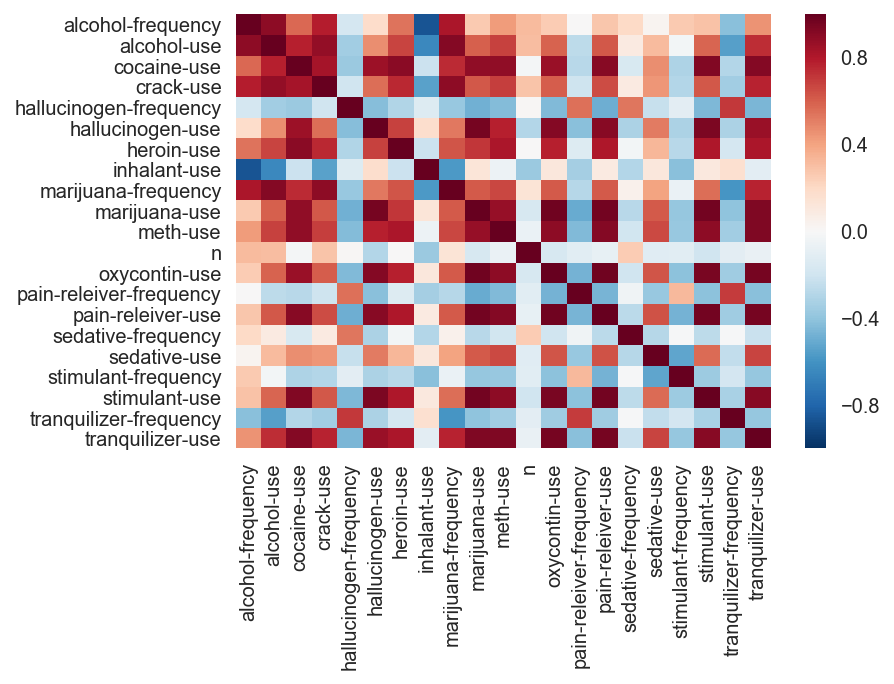

In [549]:
# Code
sns.heatmap(drug.corr())

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [560]:
#no. no value above or bellow 3. 
#boxplot is a good tool to see the outliers

math_out = np.mean(df_sub['Math']) + (np.std(df_sub['Math']) * 3)
verb_out = np.mean(df_sub['Verbal']) + (np.std(df_sub['Verbal']) * 3)
math_low = np.mean(df_sub['Math']) - (np.std(df_sub['Math']) * 3)
verb_low = np.mean(df_sub['Verbal']) - (np.std(df_sub['Verbal']) * 3)
print("The outliers for Math are not between",math_low,"and",math_out)
print ("The outleirs for Verbal are not between", verb_low, "and", verb_out)
i = 0
while i < len(df_sub):
    if df_sub['Math'][i] > math_out or df_sub['Math'][i] < math_low:
        print ("Outlier for Math",df_sub['Math'][i])
    else:
        pass
    if df_sub['Verbal'][i] > verb_out or df_sub['Verbal'][i] < verb_low:
        print ("Outlier for Verbal",df_sub['Verbal'][i])
    else:
        pass
    i += 1

df_sub.describe()

The outliers for Math are not between 424.4990115070822 and 638.5009884929178
The outleirs for Verbal are not between 433.2739458844209 and 630.7645156540405


,Verbal,Math,Rate
count,52.000000,52.000000,52.000000
mean,532.019231,531.500000,37.153846
std,33.236225,36.014975,27.301788
min,482.000000,439.000000,4.000000
25%,501.000000,504.000000,9.000000
50%,526.500000,521.000000,33.500000
75%,562.000000,555.750000,63.500000
max,593.000000,603.000000,82.000000


In [561]:
test = df_sub[np.abs(df_sub.Math-df_sub.Math.mean())<=(3*df_sub.Math.std())]
test.describe()
#no outliers in verbal and math mean, median, and std

,Verbal,Math,Rate
count,52.000000,52.000000,52.000000
mean,532.019231,531.500000,37.153846
std,33.236225,36.014975,27.301788
min,482.000000,439.000000,4.000000
25%,501.000000,504.000000,9.000000
50%,526.500000,521.000000,33.500000
75%,562.000000,555.750000,63.500000
max,593.000000,603.000000,82.000000


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [554]:
import scipy 
print(scipy.stats.stats.spearmanr(sat[['Verbal']], sat[['Math']])[0])
#Spearman linear relationship. 
#calculate the spearman assign 1 to the largest value.
# square the difference and take the sum from 1 to n
#The formula requires to multiply the sum of differnce by 6 and divide
#by n^3 - n. 
#substract this value from 1. The value will be between -1 and 1, which -1
0.905204884794

0.905204884794


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [556]:
from scipy import stats
sat['Rank'] = [stats.percentileofscore(sat['Rate'], a) for a in sat['Rate']]
print (sat[sat['State'] == "CA"]['Rank'])
#to calculate the Pearson correlation for ranked values

23    56.730769
Name: Rank, dtype: float64


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

0      2.941176
1     14.705882
2     26.470588
3     38.235294
4     55.882353
5     67.647059
6     91.176471
7     85.294118
8     97.058824
9     79.411765
10    73.529412
11    61.764706
12    50.000000
13    44.117647
14    32.352941
15    20.588235
16     8.823529
Name: Rank, dtype: float64


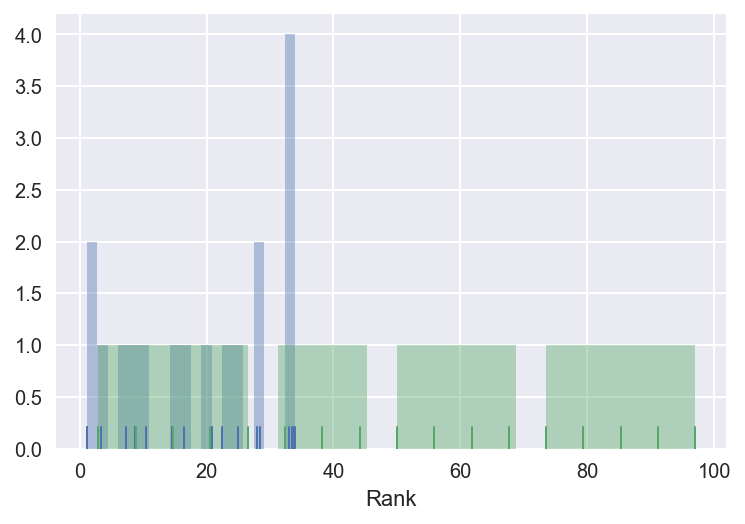

In [558]:
sns.distplot(drug['marijuana-use'], bins=20, kde=False, rug=True);
drug['Rank'] = [stats.percentileofscore(drug['marijuana-use'], a, 'mean') for a in drug['marijuana-use']]
print (drug['Rank'])
sns.distplot(drug['Rank'], bins = 20, kde= False, rug = True)
#setting the values to the mean
#converting the rows scores to percentile make it easer to visualize the values againt the mean.